In [39]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("../datasets/apple_quality.csv")
# print(df.head())
# print(df.info())
# print(df.describe())
df["Quality"] = df["Quality"].map({"good": 1, "bad": 0})
df["Acidity"] = pd.to_numeric(df["Acidity"], errors='coerce')
df = df.drop(columns=["A_id"])
# print(df.isnull().sum())
df.dropna(inplace=True)
# print(df.corr())

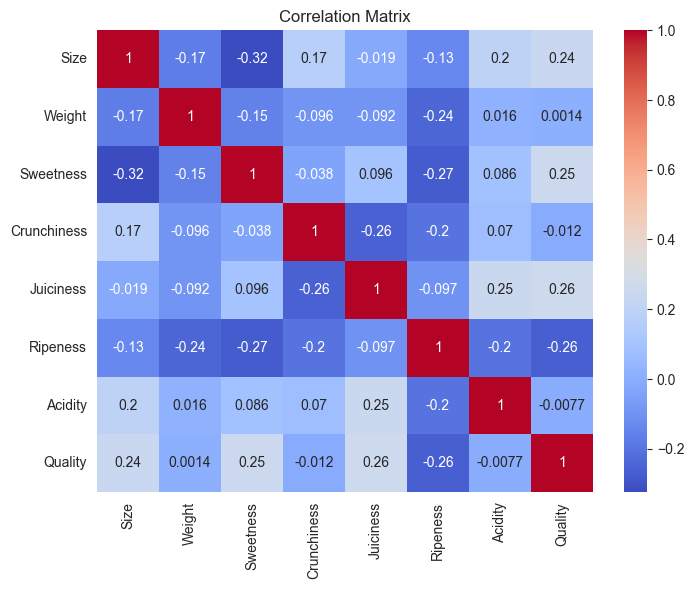

In [48]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(df, hue="Quality")
# plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("correlation matrix")
plt.show()


In [ ]:
X = df.drop(columns=['Quality'])
y = df['Quality']

In [38]:
# analyse with KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()
X = df.drop(columns=['Quality'])
y = df['Quality']

X=standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best k:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


SyntaxError: invalid syntax (1300402902.py, line 1)

In [40]:
# analyse with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.90


In [42]:
# analyse with LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 500]
}

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.75


In [44]:
# analyse with LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
Quality_mean = df['Quality'].mean()
error =(rmse/Quality_mean)*100

print(f'mse: {mse}')
print(f'percentage of error :{error}')
print('r2score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.17668760054224897
percentage of error :83.900647137286
R² Score: 0.2932451806133828
